##### John Franklin Crenshaw

.

Physics 566 Problem Set 6

March 28, 2019

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.cm import get_cmap
from matplotlib import colors

# Plot aesthetics
plt.style.use('jfc') # a style sheet I have defined on my computer
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 8.1
###### *Low-pass filter*

A low-pass filter can be constructed from a resistor and a capacitor as shown in the text. The differential equation for this system is
$$ \frac{dV_{out}}{dt} = \frac{1}{RC}(V_{\text{in}} - V_{\text{out}}). $$

Below I solve this ODE for varios RC values using the 4th order Runge-Kutta Method.

First, I define the 4th order Runge-Kutta method. Notice that the function is set up to handle vector input/outputs ($f(r,t) = [dx_1/dt, dx_2/dt,\ldots]$, $r(t)=[x_1(t),x_2(t),\ldots]$, etc). I do this so that I can use the same function later.

In [2]:
def runge_kutta(f,r0,t0,tf,nsteps):
    """
    Solve f(r,t) = dr/dt with 4th order Runge-Kutta Method.
    
    f  = is a function object for the array of ODE's
    r0 = initial condition
    t0 = initial t-value
    tf = final t-value
    nsteps = number of steps to evaluate in (t0,tf)
    """
    
    h = (tf-t0)/nsteps
    tpoints = np.arange(t0,tf,h)
    rpoints = np.reshape(r0,(-1,1))
    
    # initialize r = r0
    r = np.array(r0,copy=True,dtype=float)
    for t in tpoints[1:]:
        # update r
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        # add current r to rpoints
        rcol = np.reshape(r,(-1,1))
        rpoints = np.hstack((rpoints,rcol))
        
    return tpoints, rpoints

Now the differential equation. First, I define the function $V_{\text{in}}(t)$. Then I define a function that takes an $RC$ value and returns a function object for the differential equation. This is because I need to pass a function object to the Runge-Kutta integrator.

In [3]:
# Differential Equation
Vin = lambda t: (-1)**((2*t)//1)
def diffeq(RC):
    """Return the differential equation with the specified RC constant."""
    f = lambda Vout, t: 1/RC*(Vin(t) - Vout)
    return f

Finally, I solve the differential equation for $V_0 = 0$, $t_0 = 0$, and $t_f = 10$s, using 1000 steps. I plot the results for 3 different $RC$ values.

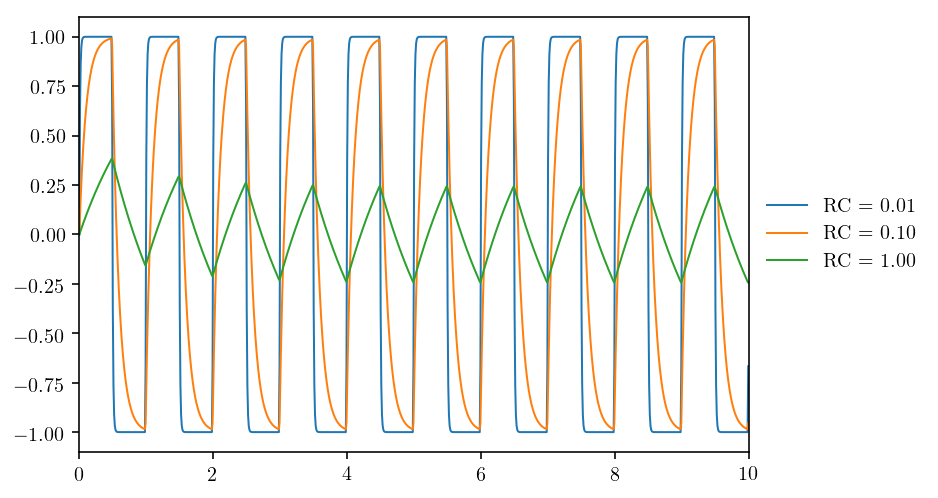

In [4]:
# parameters
V0 = 0
t0 = 0
tf = 10
N  = 1000

# plot solution for various RC
f = diffeq(0.01)
t, Vout = runge_kutta(f,V0,t0,tf,N)
plt.plot(t,Vout[0],label="RC = 0.01")

f = diffeq(0.1)
t, Vout = runge_kutta(f,V0,t0,tf,N)
plt.plot(t,Vout[0],label="RC = 0.10")

f = diffeq(1)
t, Vout = runge_kutta(f,V0,t0,tf,N)
plt.plot(t,Vout[0],label="RC = 1.00")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0,10)

plt.show()

As $RC$ increases, the filter removes more of the high-frequency component. This result in a slower change in potential. As a result, the sharp transition is slowed into a smooth transition. As $RC$ gets even greater, the potential no longer has time to reach its max/min values.

***
#### (2) CP 8.2
###### *The Lotka-Volterra equations*

You can use simultaneous differential equations to model to populations of a predator and prey system. A famous model of this system was developed by Lotka and Volterra. 

In their model, a population of foxes ($y$) prey on a population of rabbits ($x$). The rabbits reproduce at a rate proportional to their own population ($\alpha x$), and are eaten by foxes at a rate proportional to their own population and the population of foxes ($\beta x y$):
$$ \frac{dx}{dt} = \alpha x - \beta x y. $$
At the same time, the population of foxes grows in proportion to their population times the number of rabbits ($\gamma x y$), and decreases in proportion to their own population ($\delta y$):
$$ \frac{dy}{dt} = \gamma x y - \delta y. $$

I solve and plot this system below. The solutions are again calculated with the 4th order Runge-Kutta method.

First, I write the Lotka-Volterra equations in vector form:

In [5]:
def f(r,t):
    """Vector form of the Lotka-Volterra equations"""
    
    # parameters
    a = 1
    b = 0.5
    c = 0.5
    d = 2
    
    # calculate values
    x = r[0]
    y = r[1]    
    return np.array([a*x-b*x*y, c*x*y-d*y])

Now I plot the solution for a specified set of parameters:

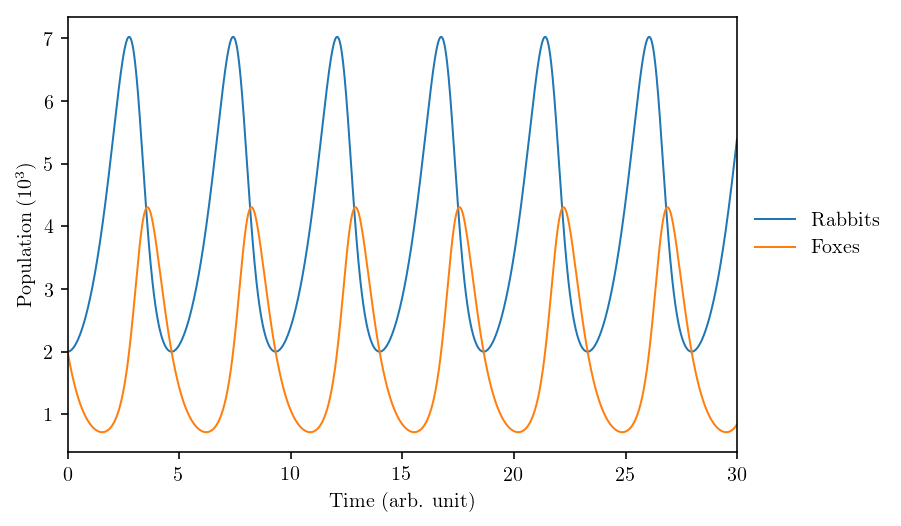

In [6]:
# parameters
r0 = [2,2]
t0 = 0
tf = 30
N  = 3000

# solve the system
t,pop = runge_kutta(f,r0,t0,tf,N)

# plot results
plt.plot(t,pop[0],label="Rabbits")
plt.plot(t,pop[1],label="Foxes")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0,30)
plt.xlabel("Time (arb. unit)")
plt.ylabel("Population ($10^3$)")

plt.show()

The results are quite intuitive. As the population of rabbits increases, so does the population of foxes. Eventually, there are so many foxes, that the rabbits are eaten faster than they can reproduce, so their population falls. As the population of rabbits falls, there are no longer enough rabbits to sustain the high fox population, which subsequently descreases. As the fox population decreases, the rabbit population begins to rise once more. The whole cycle repreats indefinitely.

***
#### (3) CP 8.3
###### *The Lorenz equations and chaos*

A famous set of differential equations are the Lorenz equations:
$$ \frac{dx}{dt} = \sigma (y-x), $$
$$ \frac{dy}{dt} = r x - y - x z, $$
$$ \frac{dz}{dt} = xy - bz. $$

They are famous because they are appear simple, but give rise to chaos and the famous "Strange Attractor." I solve the system with Runge-Kutta, and make plots to display these two interesting features.

First, the Lorenz equations in a vector:

In [7]:
def f(r,t):
    """Vector form of the Lorenz equations"""
    # parameters
    sigma = 10
    R = 28
    b = 8/3
    # calculate values
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([sigma*(y-x),R*x-y-x*z,x*y-b*z])

Now I plot a particular solution:

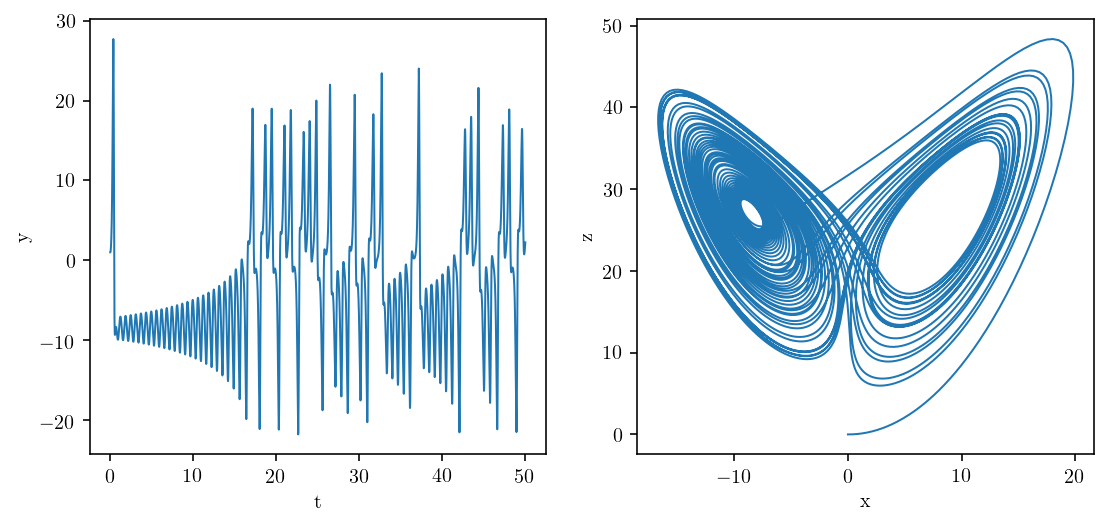

In [8]:
# parameters
r0 = [0,1,0]
t0 = 0
tf = 50
N  = 10000

# solve the system
t,r = runge_kutta(f,r0,t0,tf,N)

# plot results
fig1,(ax11,ax12) = plt.subplots(1,2,figsize=(9,4))

ax11.plot(t,r[1])
ax11.set_xlabel("t")
ax11.set_ylabel("y")

ax12.plot(r[0],r[2])
ax12.set_xlabel("x")
ax12.set_ylabel("z")

plt.show()

The plot on the left shows y vs t. It displays chaotic behavior. The plot on the right (z vs x) shows the strange attractor. Solutions to the system appear to orbit two points, and the path never repeats.

Now, I make a 3D plot to show the full behavior:

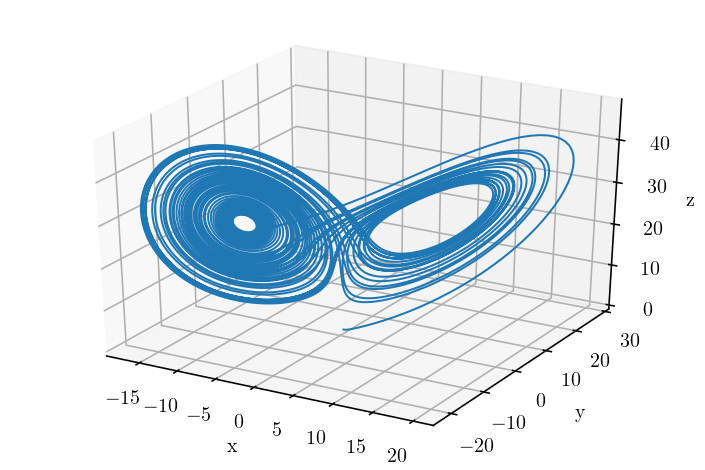

In [9]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot(r[0],r[1],r[2])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z",labelpad=0.8)
plt.show()

***
#### (4) CP 8.7
###### *Trajectory with air resistance*

The air resistance on a moving sphere is a force in the opposite direction to the motion with magnitude
$$ F_d = \frac{1}{2} \pi R^2 \rho C v^2, $$
where $R$ is the sphere's radius, $\rho$ is the density of air, $v$ is the velocity, and $C$ is the coefficient of drag. The x-component of this force is $F_d \cos{\theta}$, where $\theta$ is the angle that the velocity makes with the x-axis. As $\cos{\theta} = \frac{\dot{x}}{\sqrt{\dot{x}^2+\dot{y}^2}}$, we have
$$ F_{d,x} = \frac{1}{2} \pi R^2 \rho C v^2 \cdot \cos{\theta} = \frac{1}{2} \pi R^2 \rho C (\dot{x}^2+\dot{y}^2) \cdot \frac{\dot{x}}{\sqrt{\dot{x}^2+\dot{y}^2}} = \frac{1}{2} \pi R^2 \rho C \dot{x} \sqrt{\dot{x}^2+\dot{y}^2}. $$

Now using Newton's Second Law, and taking gravity into account, we have
$$ \ddot{x} = - \frac{\pi R^2 \rho C}{2m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2} \quad \text{and} \quad
\ddot{y} = - g - \frac{\pi R^2 \rho C}{2m} \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}.$$

Now by defining
$$ \frac{dx}{dt} = v \quad \text{and} \quad \frac{dy}{dt} = w, $$
we can change these 2 second order ODE's into 4 first order ODE's:
$$ \frac{dv}{dt} = - \frac{\pi R^2 \rho C}{2m} v \sqrt{v^2 + w^2} \quad \quad \frac{dx}{dt} = v $$

$$ \frac{dw}{dt} = - g - \frac{\pi R^2 \rho C}{2m} w \sqrt{v^2 + w^2} \quad \quad \frac{dy}{dt} = w.$$

Now we can solve the system with the Runge-Kutta Method.

First, I define a function that contains the equations of motion in a vector. I want to be able to vary the mass m used inside this function, but I need to input a mass and output a function object for use in the Runge-Kutta function. Thus I nest the ODE function inside a function that takes the mass and returns the ODE function object. I also add a drag coefficient that I can set = 0 to remove the drag force, so that I can compare the results to the scenario with no drag force.

In [46]:
def diffeq(m,drag=1):
    """Returns a function object for the ODE of a cannonball
    under air resistance, for a specific mass, m."""
    
    def f(r,t):
        """Equations of motion for a cannonball with air resistance"""
        
        # parameters
        g = 9.80665 # m/s^2
        R = 0.08 # meters
        rho = 1.22 # kg/m^3
        C = 0.47
        const = np.pi*R**2*rho*C/(2*m) *drag
        
        # calculate values
        x = r[0]
        v = r[1] # dx/dt
        y = r[2]
        w = r[3] # dy/dt
        
        values = [v,                               # dx/dt
                 -const*v*np.sqrt(v**2 + w**2),    # dv/dt
                 w,                                # dy/dt
                 -g-const*w*np.sqrt(v**2 + w**2)]  # dw/dt
        
        return np.array(values)
    
    return f

Now I find a particular solution and plot the trajectory. I also plot the trajectory with no drag as a comparison.

In [47]:
# parameters to use in all of the plots
theta = 30 # degrees
theta *= np.pi/180 # convert to radians
v0 = 100 # m/s
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)

r0 = [0,v0x,0,v0y]
t0 = 0
tf = 11
N  = 40

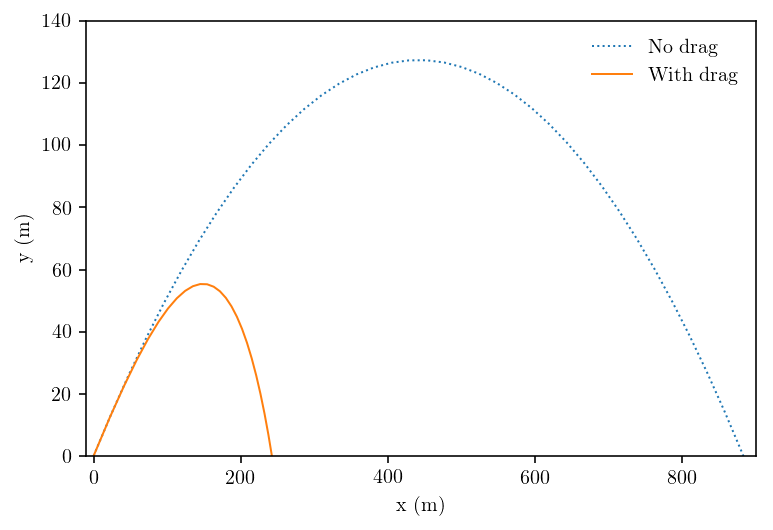

In [48]:
# solve the system and plot results

m = 1 # kg

# no drag
f = diffeq(m,drag=0)
t, r = runge_kutta(f,r0,t0,tf,N)
plt.plot(r[0],r[2],linestyle=":",label="No drag")

# with drag
f = diffeq(m)
t, r = runge_kutta(f,r0,t0,tf,N)
plt.plot(r[0],r[2],label="With drag")

plt.legend()

plt.xlim(-10,900)
plt.ylim(0,140)
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.show()

The plot looks how one would expect: the range of the cannonball is shorter, and the trajectory "leans right".

Now I plot trajectories for a wide variety of masses to see how the mass affects the horizontal distance traveled in the air.

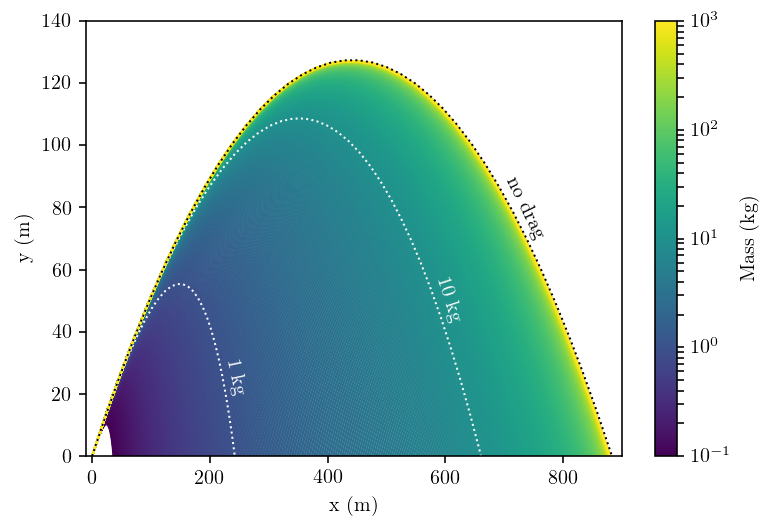

In [49]:
# mass range
m0 = 0.1 # min mass
mf = 1000 # max mass
nmasses = 600 # number of mass samples
# sample uniformly from a log distribution
masses = np.logspace(np.log10(m0),np.log10(mf),nmasses) # kg

# colormap for trajectories
cmap = get_cmap('viridis')

# Now I loop through all of the masses, and plot the trajectory
# each trajectory is colored by its mass, on a log scale
for m in masses:
    # solve equation of motion
    f = diffeq(m)
    t, r = runge_kutta(f,r0,t0,tf,N)
    # select the color from a log scale
    color = cmap(np.log10(m/m0)/np.log10(mf/m0))
    # plot trajectory
    plt.plot(r[0],r[2],c=color)

    
# Now plot and label trajectories for 1 and 10 kg

# 1 kg
f = diffeq(1)
t, r = runge_kutta(f,r0,t0,tf,N)
plt.plot(r[0],r[2],c='w',linestyle=":")
plt.text(246,25,"1 kg",rotation=-78,color='w',ha='center',va='center')

# 10 kg
f = diffeq(10)
t, r = runge_kutta(f,r0,t0,tf,N)
plt.plot(r[0],r[2],c='w',linestyle=":")
plt.text(608,50,"10 kg",rotation=-72,color='w',ha='center',va='center')


# plot line for no-drag trajectory
# note this also corresponds to mass = infinity
f = diffeq(m,drag=0)
t, r = runge_kutta(f,r0,t0,tf,N)
plt.plot(r[0],r[2],c='k',linestyle=":")
plt.text(737,80,"no drag",rotation=-64,color='k',ha='center',va='center')


# Create a log-scale colorbar
norm = colors.LogNorm(vmin=m0,vmax=mf)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Mass (kg)')

# plot settings
plt.xlim(-10,900)
plt.ylim(0,140)
plt.xlabel("x (m)")
plt.ylabel("y (m)")


plt.show()

The above plot shows the trajectory of an ensemble of masses, which allows us to see how the trajectory is affected by mass. A trajectory of constant color represents the trajectory for a specific mass. Trajectories for 1 kg and 10 kg are drawn and labeled for reference. You can see that as mass is increased, the maximum range increases, both in x and y. In the limit that m approaches infinity, the trajectory approaches the no-drag trajectory. This is because the force of air friction becomes less and less relevant as the mass increases. $a = F/m$, and $F_d$ is independent of mass, so $a_d \propto \frac{1}{m}$.

***
#### (5) CP 8.16
###### *The Three Body Problem*

The three body problem is a famous problem in which you solve for the positions of 3 objects moving under the influence of their mutual gravity. In general, there is no closed form solution, and it must be done numerically. 

The acceleration of mass 1 due to the gravity from masses 2 and 3 is

$$ \frac{d^2 \bf{r}_1}{dt^2} = Gm_2 \frac{\bf{r}_2 - \bf{r}_1}{\mid \bf{r}_2 - \bf{r}_1 \mid^3} + Gm_3 \frac{\bf{r}_3 - \bf{r}_1}{\mid \bf{r}_3 - \bf{r}_1 \mid^3} .$$

In general
$$ \frac{d^2 \bf{r}_i}{dt^2} = \sum_{j \neq i} Gm_j \frac{\bf{r}_j - \bf{r}_i}{\mid \bf{r}_j - \bf{r}_i \mid^3}. $$
Again, the system is solved by defining
$$ y_i = \frac{d r_i }{dt} $$
and by splitting $r_i$ up into the components $x_i, y_i, z_i$. This can then be solved as a large system of first order ODE's.

In [168]:
def rk_adaptive(f,r0,t0,tf,tol=0.1,errpos=None):
    """
    Solve f(r,t) = dr/dt with adaptive 4th order Runge-Kutta Method.
    
    f  = is a function object for the array of ODE's
    r0 = initial condition
    t0 = initial t-value
    tf = final t-value
    tol = error tolerance per unit time, defaults to 0.1
    errpos = positions of variables in r that will be used
             to calculate the error, defaults to all
    """
    
    # if no errpos provided, use all variables for error
    if errpos == None:
        errpos = np.arange(0,len(r0))

    # arrays to save solution
    tpoints = [t0]
    rpoints = np.reshape(r0,(-1,1))
    
    # initial guess for step size
    h = 1e-3
    
    # initialize t = t0, r = r0
    t = t0
    r = np.array(r0,copy=True,dtype=float)
    
    
    while t < tf:
        
        # initialize r1,r2 = r
        r1 = np.copy(r)
        r2 = np.copy(r)
        
        # make 2 steps with step size h
        r1 = rk_update(r1,t,f,h)
        r1 = rk_update(r1,t,f,h)
        
        # make 1 step with step size 2h
        r2 = rk_update(r2,t,f,2*h)
        
        # calculate rho
        d2 = sum([(r1[i] - r2[i])**2 for i in errpos])
        # set lower limit on d^2 s.t. rho = 2
        d2 = np.clip(d2,225*h**2*tol**2,None)
        rho = 30*h*tol/np.sqrt(d2)
        
        if rho >= 1:
            t += 2*h
            r = r1
            tpoints.append(t)
            rcol = np.reshape(r,(-1,1))
            rpoints = np.hstack((rpoints,rcol))
        
        # update h
        h *= rho
        
    return tpoints, rpoints


# this function is used above
def rk_update(r,t,f,h):
    """Update the vector r given f(r,t) = dr/dt,
    using 4th order Runge-Kutta with step size h."""
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    return r

As a sanity check, I will use the adaptive method to re-plot the above solution to the Lorenz Equations:

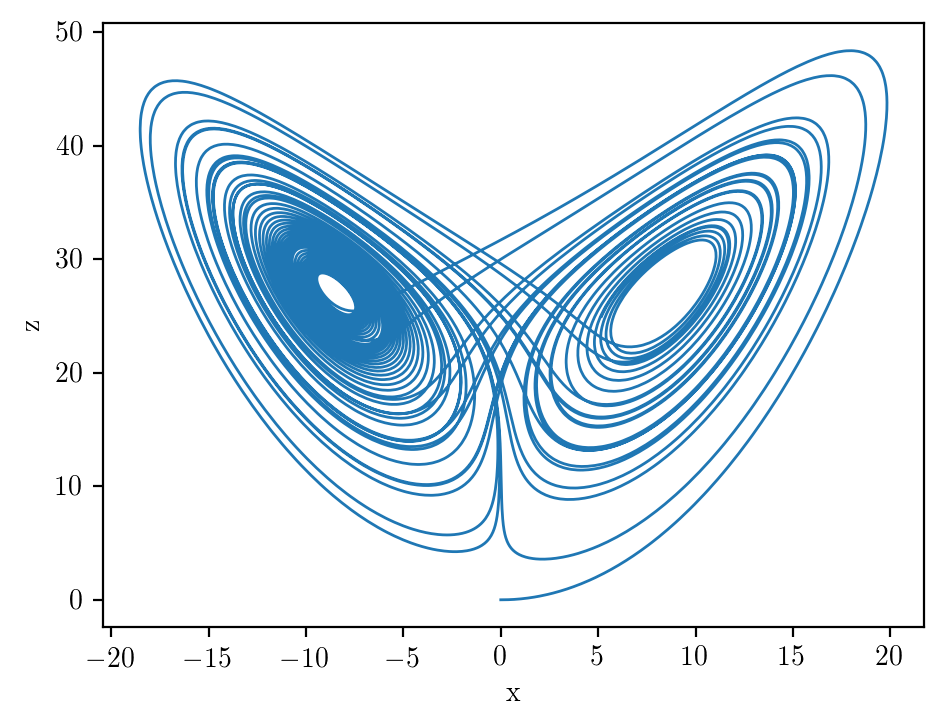

In [169]:
def f(r,t):
    """Vector form of the Lorenz equations"""
    # parameters
    sigma = 10
    R = 28
    b = 8/3
    # calculate values
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([sigma*(y-x),R*x-y-x*z,x*y-b*z])

# parameters
r0 = [0,1,0]
t0 = 0
tf = 50
tol = 1e-6
errpos = [0,1,2]

t,r = rk_adaptive(f,r0,t0,tf,tol,errpos)

plt.plot(r[0],r[2])
plt.xlabel("x")
plt.ylabel("z")

plt.show()

This plot matches the previous result, suggesting that my code is correct.

Now I use it to solve the Three Body Problem! First I define the function for the equation of motion:

In [170]:
def f(r,t):
    # parameters
    m1 = 150
    m2 = 200
    m3 = 250
    # variables
    r1 = r[0:2]
    v1 = r[2:4] # dr1/dt
    r2 = r[4:6]
    v2 = r[6:8] # dr2/dt
    r3 = r[8:10]
    v3 = r[10:12] # dr3/dt
    # distances
    d21 = np.linalg.norm(r2-r1)
    d31 = np.linalg.norm(r3-r1)
    d32 = np.linalg.norm(r3-r2)
    # values
    values = [v1[0],
              v1[1],
              m2*(r2[0]-r1[0])/d21**3 + m3*(r3[0]-r1[0])/d31**3,
              m2*(r2[1]-r1[1])/d21**3 + m3*(r3[1]-r1[1])/d31**3,
              v2[0],
              v2[1],
              m1*(r1[0]-r2[0])/d21**3 + m3*(r3[0]-r2[0])/d32**3,
              m1*(r1[1]-r2[1])/d21**3 + m3*(r3[1]-r2[1])/d32**3,
              v3[0],
              v3[1],
              m1*(r1[0]-r3[0])/d31**3 + m2*(r2[0]-r3[0])/d32**3,
              m1*(r1[1]-r3[1])/d31**3 + m2*(r2[1]-r3[1])/d32**3]
    return np.array(values)

Now I set the initial conditions to be used for all of the plots:

In [171]:
# initial conditions

x10  = 3
y10  = 1
vx10 = 0
vy10 = 0

x20  = -1
y20  = -2
vx20 = 0
vy20 = 0

x30  = -1
y30  = 1
vx30 = 0
vy30 = 0

r0 = np.array([x10,y10,vx10,vy10,x20,y20,vx20,vy20,x30,y30,vx30,vy30])

I first solve the system for 2 seconds of motion and plot the results:

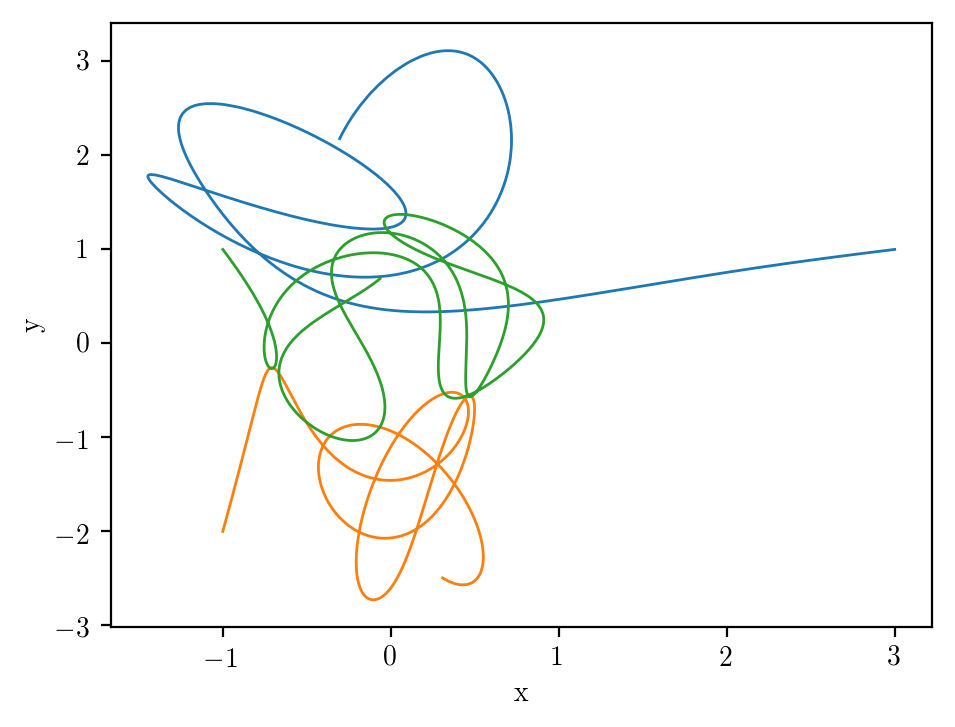

In [172]:
# parameters
t0 = 0
tf = 2
tol = 1e-6
errpos = [0,1,4,5,8,9]

# solve the system
t,r = rk_adaptive(f,r0,t0,tf,tol,errpos)

# plot the results
plt.plot(r[0],r[1])
plt.plot(r[4],r[5])
plt.plot(r[8],r[9])

plt.xlabel("x")
plt.ylabel("y")

plt.show()

It is obvious why this system cannot be solved analytically. The solution is incredibly complicated.

Now I solve the system for 10 seconds:

In [173]:
# parameters
t0 = 0
tf = 10
tol = 1e-6
errpos = [0,1,4,5,8,9]

t,r = rk_adaptive(f,r0,t0,tf,tol,errpos)

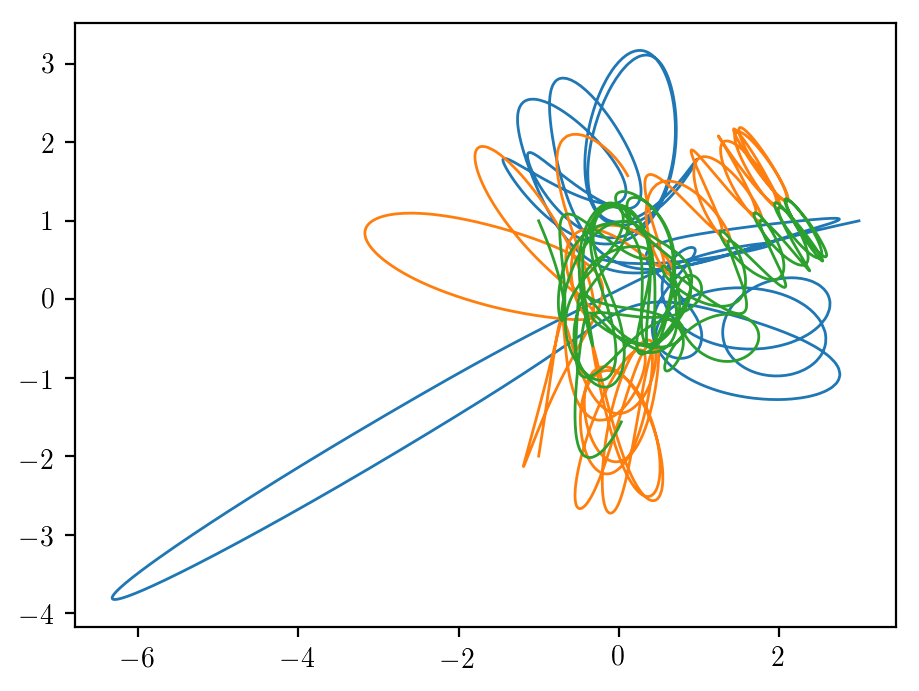

In [174]:
plt.plot(r[0],r[1])
plt.plot(r[4],r[5])
plt.plot(r[8],r[9])

plt.show()